# Neural Network with One Hidden Layer - Practice

## Assumption of Data

### X Matrix (Shape: 2×400)

In this representation, each column is an example, and each row is a feature.

| Copy       | Example_1 | Example_2 | Example_3 | ... | Example_400 |
|------------|-----------|-----------|-----------|-----|-------------|
| Feature_1  | 0.7542    | -0.1217   | 0.3224    | ... | 0.1234      |
| Feature_2  | 0.3214    | 0.9843    | 0.6105    | ... | 0.5678      |

### Y Matrix (Shape: 1×400)

In this representation, each column contains the label for the corresponding example in X.

| Copy   | Example_1 | Example_2 | Example_3 | ... | Example_400 |
|--------|-----------|-----------|-----------|-----|-------------|
| Label  | 0         | 1         | 0         | ... | 1           |

**Key Characteristics:**
- X Matrix: Features as rows, examples as columns
- Y Matrix: Labels corresponding to each example
- Total examples: 400
- Number of features: 2


In [1]:
# This notebook implements a neural network with one hidden layer for binary classification
# on the make_moons dataset from scikit-learn.

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import copy


In [2]:
# Set random seed for reproducibility
np.random.seed(3)

In [4]:
# Generate a moon dataset using sklearn as a replacement for the planar dataset
# The scikit-learn make_moons() function specifically generates a dataset that has two interleaving half-moons. 
# Each class (0 or 1) forms one of these half-moon shapes.

X_data, Y_data = make_moons(n_samples=400, noise=0.2, random_state=42)
X = X_data.T  # Shape: (2, 400)
Y = Y_data.reshape(1, Y_data.shape[0])  # Shape: (1, 400)

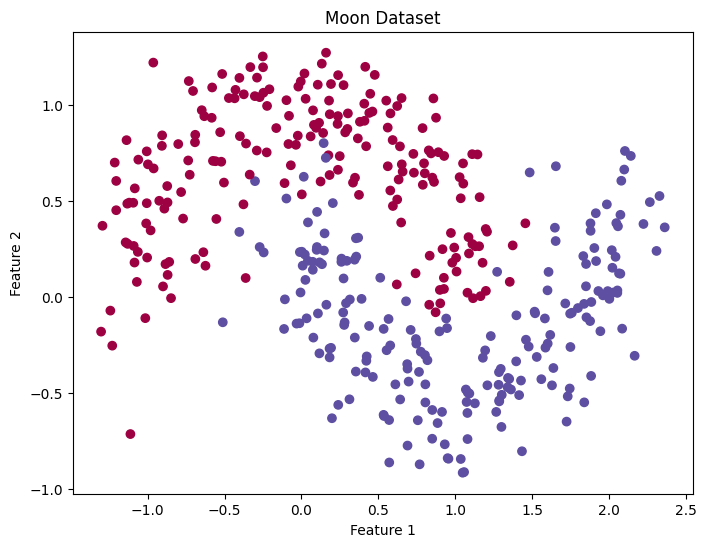

In [5]:
# Visualize the data:
# We're plotting the two features of each data point on a 2D graph
# Why? The feature values in X are coordinates that, when plotted, create a moon-shaped pattern.
plt.figure(figsize=(8, 6))
plt.scatter(X[0, :], X[1, :], c=Y.reshape(-1), cmap=plt.cm.Spectral)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Moon Dataset')
plt.show()

## Exercise 1: Get the shape of the dataset

In [7]:
# We are going to find out the shape of X and Y
shape_X = X.shape
shape_Y = Y.shape
m = shape_X[1]  # Number of training examples

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
I have m = 400 training examples!


## Define sigmoid function (provided)

In [8]:

def sigmoid(z):
    """
    Compute the sigmoid of z
    
    Arguments:
    z -- A scalar or numpy array of any size.
    
    Return:
    s -- sigmoid(z)
    """
    s = 1 / (1 + np.exp(-z))
    return s

## Simple Logistic Regression using sklearn for comparison

In [13]:

from sklearn.linear_model import LogisticRegression

# Train logistic regression
clf = LogisticRegression()
clf.fit(X.T, Y.reshape(-1)) # We need to send features as columns and data as rows that why we are using transpose and instead of 2D y should be 1D so I am doing reshape to convert to 1D
# The sckitlearn Logistic Model expects the data in that way, so we need to convert them in that wa before we fit data into the model.

LogisticRegression()

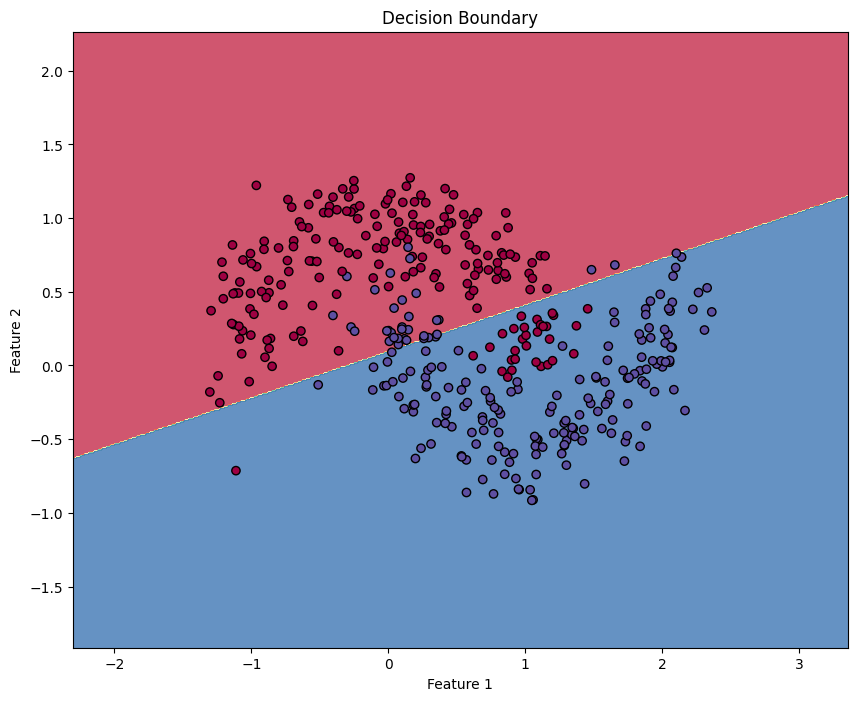

In [14]:
# Plot the decision boundary for logistic regression
def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X.
    
    Arguments:
    model -- model that has a predict function
    X -- input data of shape (2, m)
    y -- output data of shape (1, m)
    """
    # Set min and max values for plotting
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    
    # Generate a grid of points
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Run model prediction on all points in the grid
    if isinstance(model, LogisticRegression):
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = model(np.c_[xx.ravel(), yy.ravel()].T)
    Z = Z.reshape(xx.shape)
    
    # Plot the contour and training examples
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[0, :], X[1, :], c=y.reshape(-1), cmap=plt.cm.Spectral, edgecolors='k')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary")
    plt.show()

# Plot decision boundary for logistic regression
plot_decision_boundary(clf, X, Y)

In [43]:
# Calculate accuracy for logistic regression
from sklearn.metrics import accuracy_score
LR_predictions = clf.predict(X.T)
accuracy = 100 * np.mean(LR_predictions == Y.reshape(-1))
# accuracy = accuracy_score(LR_predictions,Y.reshape(-1)) * 100
print('Accuracy of logistic regression: {:0.2f}%'.format(accuracy))
print("(percentage of correctly labelled datapoints)\n")

Accuracy of logistic regression: 84.00%
(percentage of correctly labelled datapoints)



# Neural Network Model

## Exercise 2: Define layer sizes


In [61]:
def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- labels of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer (set to 4 for this exercise)
    n_y -- the size of the output layer
    """
    n_x = X.shape[0]  # Size of input layer(2 features)
    n_h = 4           # Size of hidden layer (fixed to 4 for this exercise)
    n_y = Y.shape[0]  # Size of output layer(1 label(0/1))
    
    return (n_x, n_h, n_y)

In [62]:
# Example usage of layer_sizes
(n_x, n_h, n_y) = layer_sizes(X, Y)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 2
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 1


## Exercise 3: Initialize parameters

In [63]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    np.random.seed(2)  # For consistent initialization
    
    # Initialize weights with small random values to break symmetry
    W1 = np.random.randn(n_h, n_x) * 0.01 # We will initialize weights to random values instead of zero. Why? The symmetry problem,if we take 0 backpropagation dont work for non convex functions 
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [64]:
# Example usage of initialize_parameters
parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))


W1 = [[-0.00416758 -0.00056267]
 [-0.02136196  0.01640271]
 [-0.01793436 -0.00841747]
 [ 0.00502881 -0.01245288]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.01057952 -0.00909008  0.00551454  0.02292208]]
b2 = [[0.]]


## Exercise 4: Forward propagation

In [65]:
def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve parameters from the dictionary
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Implement Forward Propagation to calculate A2
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1) # We are applying tanh activation function instead of sigmoid for the first layer
    # Why tanh? 
    # Three reasons to use Tanh in hidden layer:
        # Because of Zero centered property the values of tanh which is 0, so data surrond around this point. 
        # because of strong gradient values, the max value of the tanh gradient is 1 and simoid is 0.25 and this helps in solving vanishing gradient problem.
        # ranges from (-1,1) and sigmoid ranges from (0,1). The wider range give neurons excessive power.
    # So tanh has the zero centered, strong gradient, range domination  helps hidden layer to learn better4
    
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2) # here we are using sigmoid because the output layer should output either label 1 or label 0 (binary classification). So it will be better to use sigmoid for binary classifcation
    
    assert(A2.shape == (1, X.shape[1])) # (1,m) m -> number of training examples in this case 400.
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [67]:
# Example usage of forward_propagation
A2, cache = forward_propagation(X, parameters)
print("A2 = " + str(A2))

A2 = [[0.49993274 0.50008523 0.49998073 0.49999883 0.49989858 0.4999308
  0.50014335 0.49990434 0.50006627 0.49984442 0.50004699 0.500074
  0.49989282 0.49989854 0.49988034 0.49997174 0.50013865 0.5000973
  0.49998599 0.50010719 0.49991451 0.50003633 0.50004898 0.50009285
  0.50004236 0.5000547  0.49988201 0.50001434 0.50007892 0.49992336
  0.50011838 0.49992922 0.5000912  0.49995768 0.50001692 0.49985777
  0.49993636 0.50014479 0.49988595 0.49987491 0.50007052 0.4999447
  0.4999363  0.49993168 0.49990346 0.50010508 0.49981967 0.49989509
  0.50004112 0.49986953 0.49998223 0.50013661 0.5001067  0.49994827
  0.50008668 0.49999126 0.49997202 0.4998757  0.50004205 0.49985142
  0.4998333  0.50015237 0.50008191 0.49991827 0.49987529 0.49998415
  0.50015826 0.50006857 0.50001733 0.49987898 0.50012818 0.49985557
  0.5000613  0.49992316 0.50008719 0.50002997 0.49999451 0.50006196
  0.49990947 0.50011233 0.50005284 0.50005761 0.49990898 0.50002677
  0.50009494 0.49991493 0.50006811 0.50012915 0.

## Exercise 5: Compute cost

In [68]:
def compute_cost(A2, Y):
    """
    Computes the cross-entropy cost
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """
    m = Y.shape[1]  # Number of examples
    
    # Compute the cross-entropy cost
    logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), 1 - Y)
    cost = -1/m * np.sum(logprobs)
    
    cost = float(np.squeeze(cost))  # Makes sure cost is the dimension we expect, convert from [1] to 1
    
    return cost


In [69]:
# Example usage of compute_cost
cost = compute_cost(A2, Y)
print("cost = " + str(cost))

cost = 0.6929947513932229


## Exercise 6: Backward propagation

In [70]:
def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1] # m -> training examples -> 400 
    
    # Retrieve parameters
    W1 = parameters["W1"] # W1 -> shape -> (n_h,n_x) -> (4,2)
    W2 = parameters["W2"] # W2 -> shape -> (n_y,n_h) -> (1,4)
    
    # Retrieve cached values
    A1 = cache["A1"] # Same shape as W1
    A2 = cache["A2"] # Same shape as W2
    
    # Backward propagation: calculate dW1, db1, dW2, db2
    # We can do all these derivatives using pen and paper
    
    dZ2 = A2 - Y
    dW2 = 1/m * np.dot(dZ2, A1.T)
    db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = 1/m * np.dot(dZ1, X.T)
    db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [71]:
# Example usage of backward_propagation
grads = backward_propagation(parameters, cache, X, Y)
print("dW1 = " + str(grads["dW1"]))
print("db1 = " + str(grads["db1"]))
print("dW2 = " + str(grads["dW2"]))
print("db2 = " + str(grads["db2"]))

dW1 = [[ 0.0026073  -0.00199727]
 [ 0.00223697 -0.00171518]
 [-0.00135802  0.00104097]
 [-0.00564859  0.00432675]]
db1 = [[-6.97981026e-08]
 [-1.00584800e-06]
 [ 3.68125675e-07]
 [-4.92185304e-08]]
dW2 = [[ 0.0009209   0.00835828  0.00282984 -0.00359017]]
db2 = [[2.45565776e-06]]


## Exercise 7: Update parameters

In [73]:

def update_parameters(parameters, grads, learning_rate=1.2):
    """
    Updates parameters using the gradient descent update rule
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    learning_rate -- learning rate of the gradient descent update rule
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    # Retrieve a copy of each parameter from the dictionary "parameters"
    W1 = copy.deepcopy(parameters["W1"])
    b1 = copy.deepcopy(parameters["b1"])
    W2 = copy.deepcopy(parameters["W2"])
    b2 = copy.deepcopy(parameters["b2"])
    
    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]
    
    # Update parameters using gradient descent rule
    # optimizing the values of the parameters
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [74]:
# Example usage of update_parameters
parameters = update_parameters(parameters, grads)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00729633  0.00183405]
 [-0.02404632  0.01846092]
 [-0.01630474 -0.00966664]
 [ 0.01180712 -0.01764498]]
b1 = [[ 8.37577231e-08]
 [ 1.20701760e-06]
 [-4.41750809e-07]
 [ 5.90622365e-08]]
W2 = [[-0.0116846  -0.01912002  0.00211874  0.02723028]]
b2 = [[-2.94678931e-06]]


## Exercise 8: Build the neural network model

In [75]:

def nn_model(X, Y, n_h, num_iterations=10000, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model
    """
    # 1000 iterations
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0] # getting the values from the tuple returned by the layer_sizes function(n_x,n_h,n_y)
    n_y = layer_sizes(X, Y)[2]
    
    # Initialize parameters
    parameters = initialize_parameters(n_x, n_h, n_y) # dictionary
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):
        # Forward propagation
        A2, cache = forward_propagation(X, parameters)
        
        # Cost function
        cost = compute_cost(A2, Y)
        
        # Backpropagation
        grads = backward_propagation(parameters, cache, X, Y)
        
        # Update parameters
        parameters = update_parameters(parameters, grads)
        
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print("Cost after iteration %i: %f" % (i, cost))
    
    return parameters

## Exercise 9: Define predict function

In [77]:
def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns:
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Forward propagation
    A2, cache = forward_propagation(X, parameters)
    #Why we are doing again?
    # Because here we get the new data as X. So we need to do the forward propagation then get the A2, cache from the forward_propogation function
    
    # Convert probabilities to 0/1 predictions
    predictions = (A2 > 0.5) # When the value is greater than 0.5 then prediction is 1 and if it is less than 0.5 prediction is 0.
    
    return predictions

Cost after iteration 0: 0.692995
Cost after iteration 1000: 0.112572
Cost after iteration 2000: 0.078701
Cost after iteration 3000: 0.076146
Cost after iteration 4000: 0.073307
Cost after iteration 5000: 0.070828
Cost after iteration 6000: 0.069050
Cost after iteration 7000: 0.067903
Cost after iteration 8000: 0.067163
Cost after iteration 9000: 0.066658


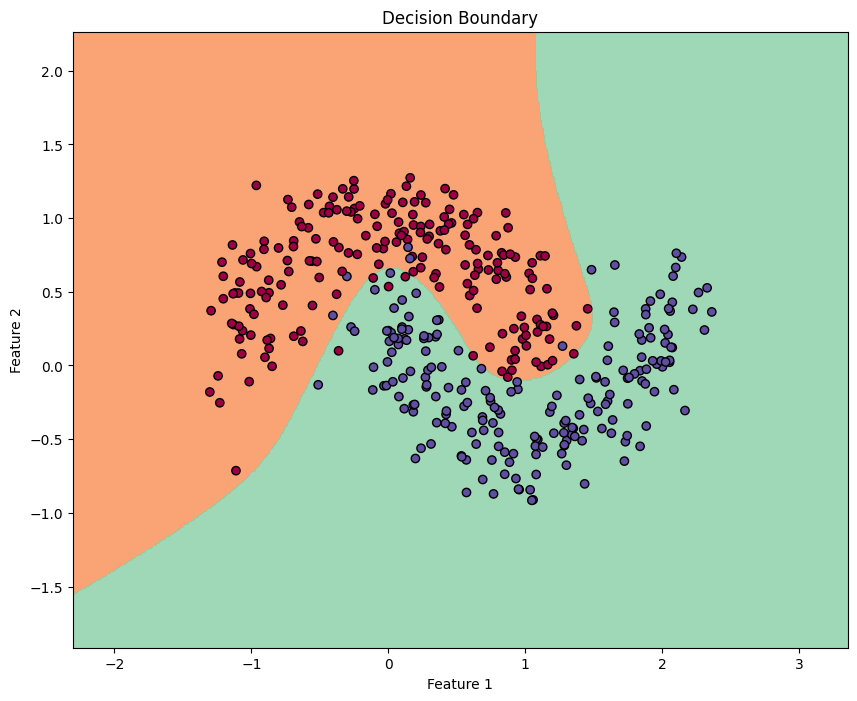

In [78]:
# Train the neural network with 4 hidden units
parameters = nn_model(X, Y, n_h=4, num_iterations=10000, print_cost=True)

# Plot the decision boundary
def nn_predict_function(X):
    """
    Wrapper function for predict to use with plot_decision_boundary
    """
    return predict(parameters, X)

plot_decision_boundary(nn_predict_function, X, Y)

In [79]:
# Calculate accuracy for neural network
predictions = predict(parameters, X)
accuracy = 100 * np.mean(predictions == Y)
print("Accuracy for neural network: {:0.2f}%".format(accuracy))

Accuracy for neural network: 97.50%


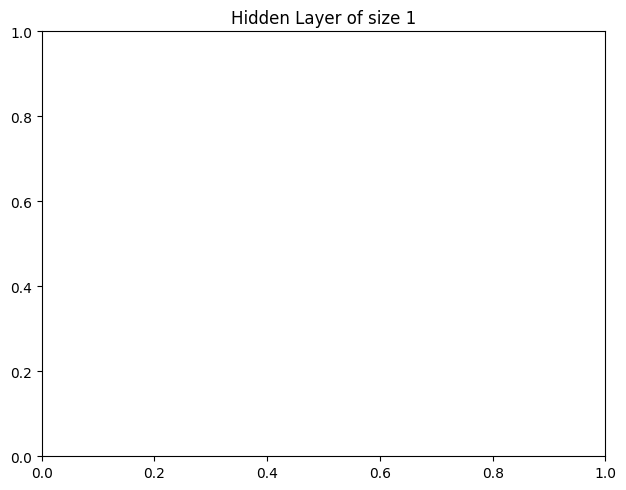

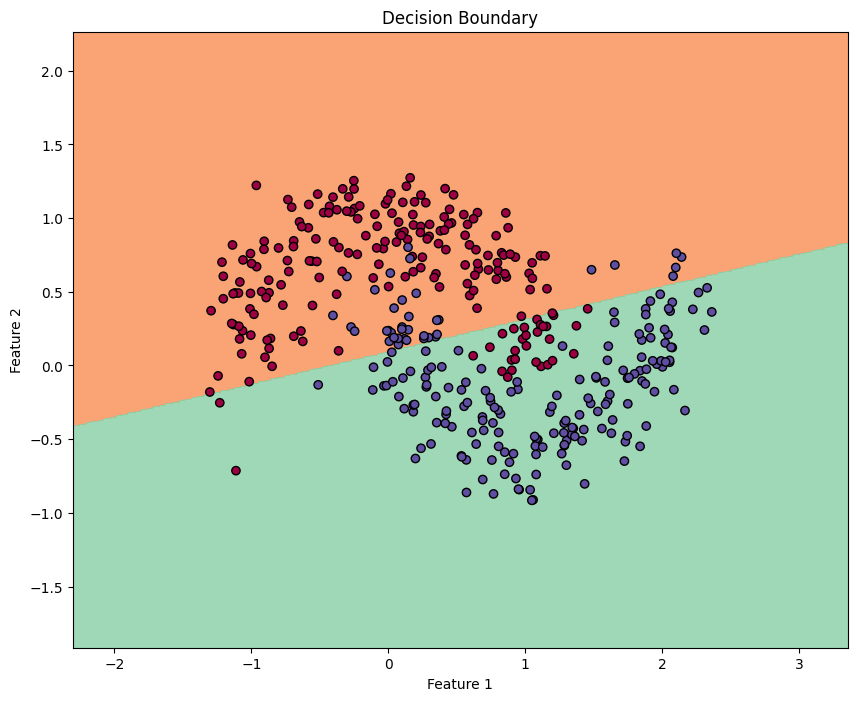

Accuracy for 1 hidden units: 83.00%


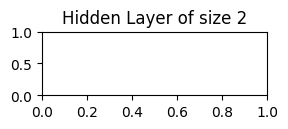

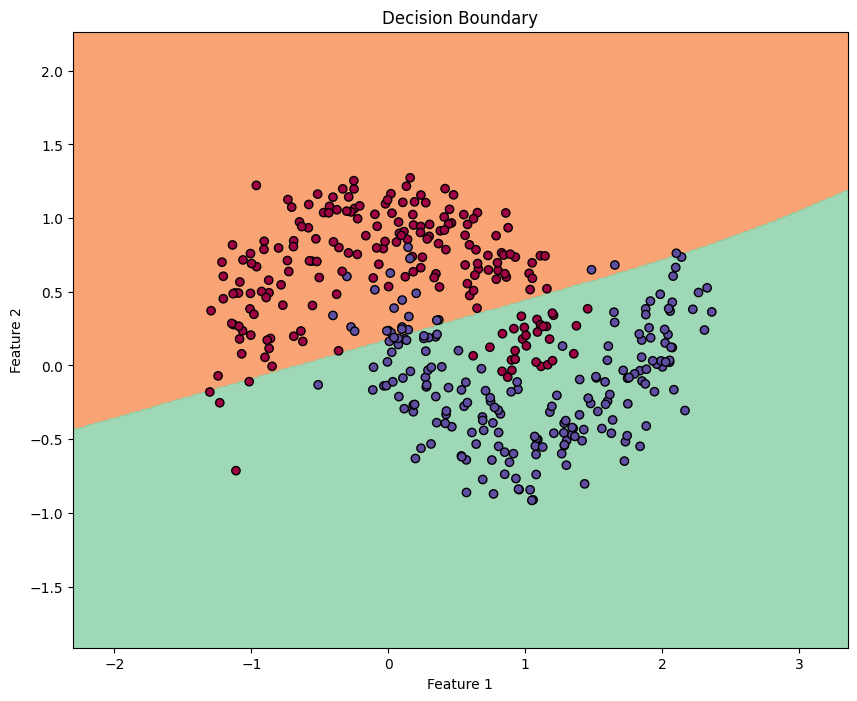

Accuracy for 2 hidden units: 85.50%


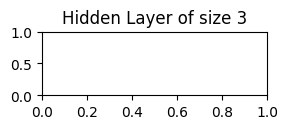

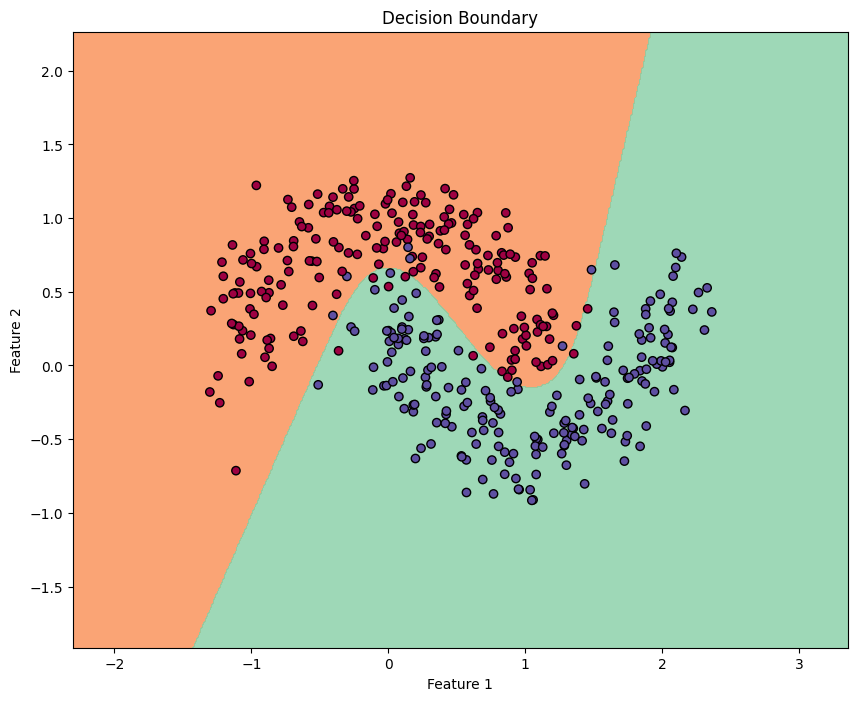

Accuracy for 3 hidden units: 96.50%


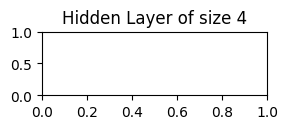

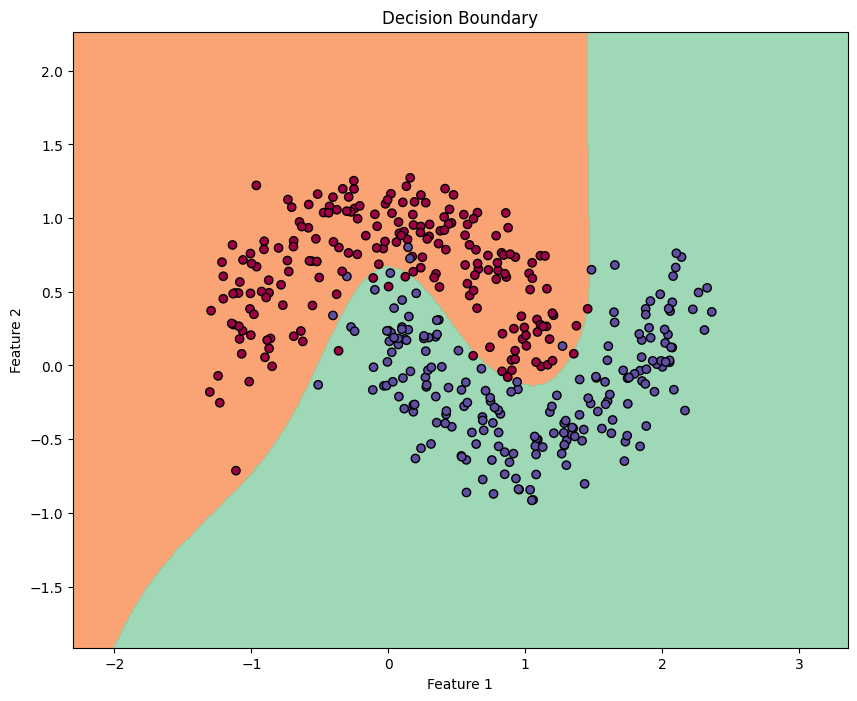

Accuracy for 4 hidden units: 96.75%


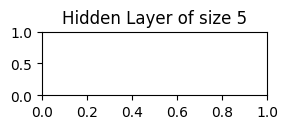

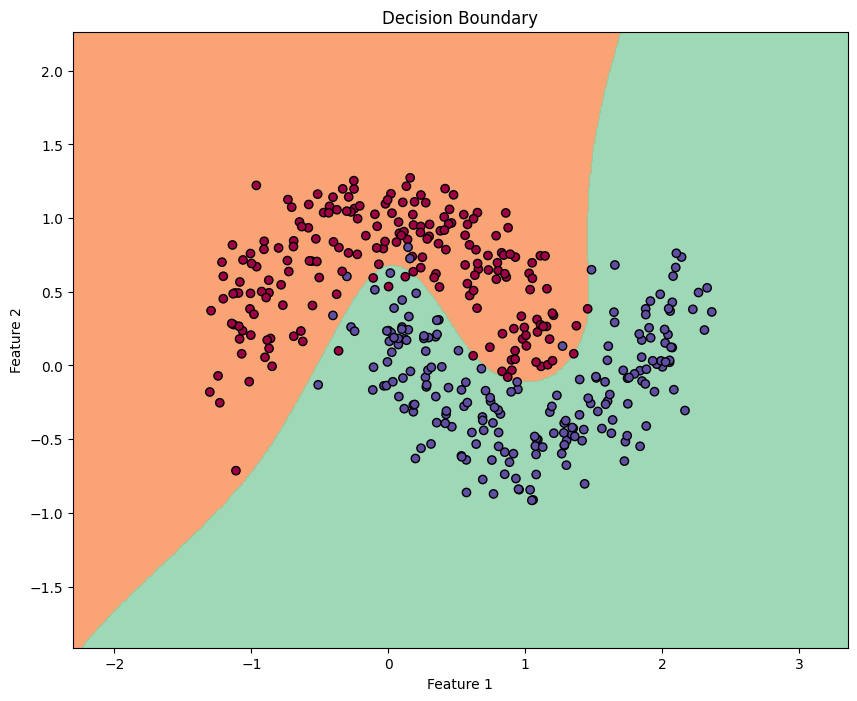

Accuracy for 5 hidden units: 97.50%


In [80]:
# Optional: Tuning hidden layer size
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5]

for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations=5000)
    
    def nn_predict_function_tuned(X):
        return predict(parameters, X)
    
    plot_decision_boundary(nn_predict_function_tuned, X, Y)
    
    predictions = predict(parameters, X)
    accuracy = 100 * np.mean(predictions == Y)
    print("Accuracy for {} hidden units: {:0.2f}%".format(n_h, accuracy))



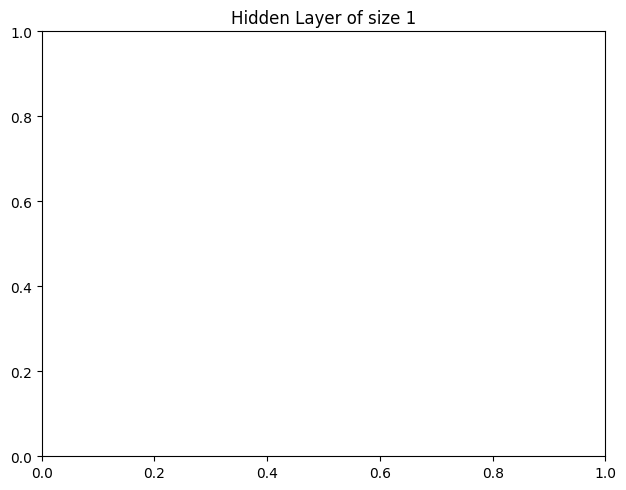

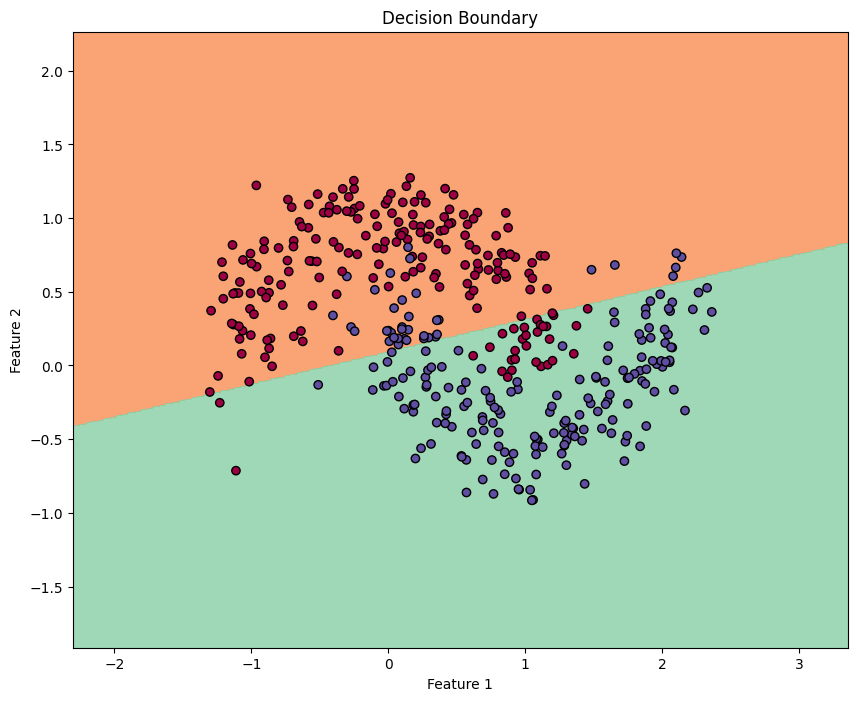

Accuracy for 1 hidden units: 83.00%


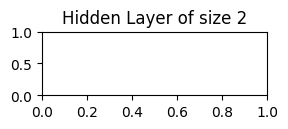

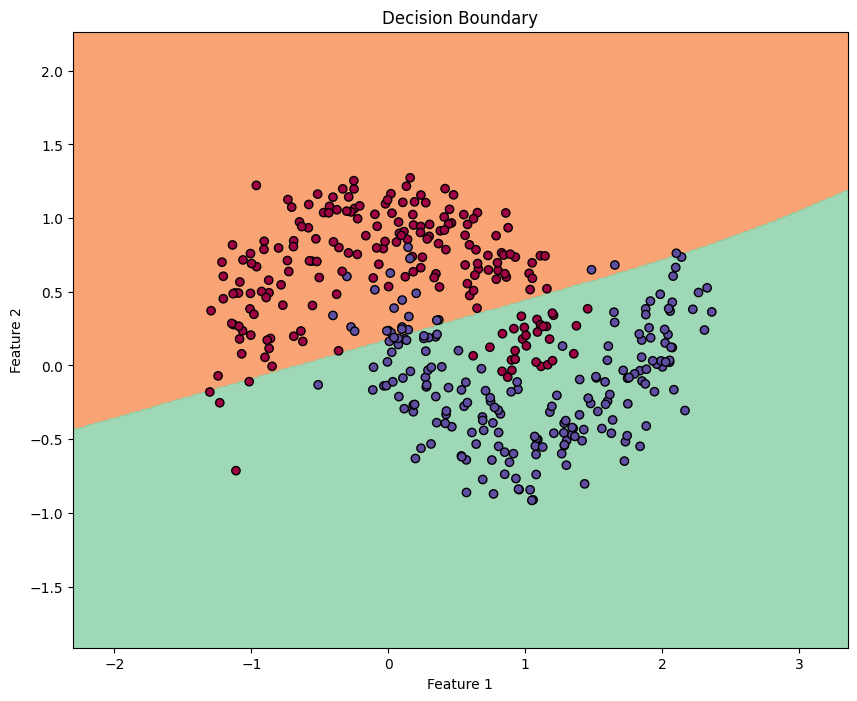

Accuracy for 2 hidden units: 85.50%


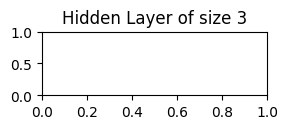

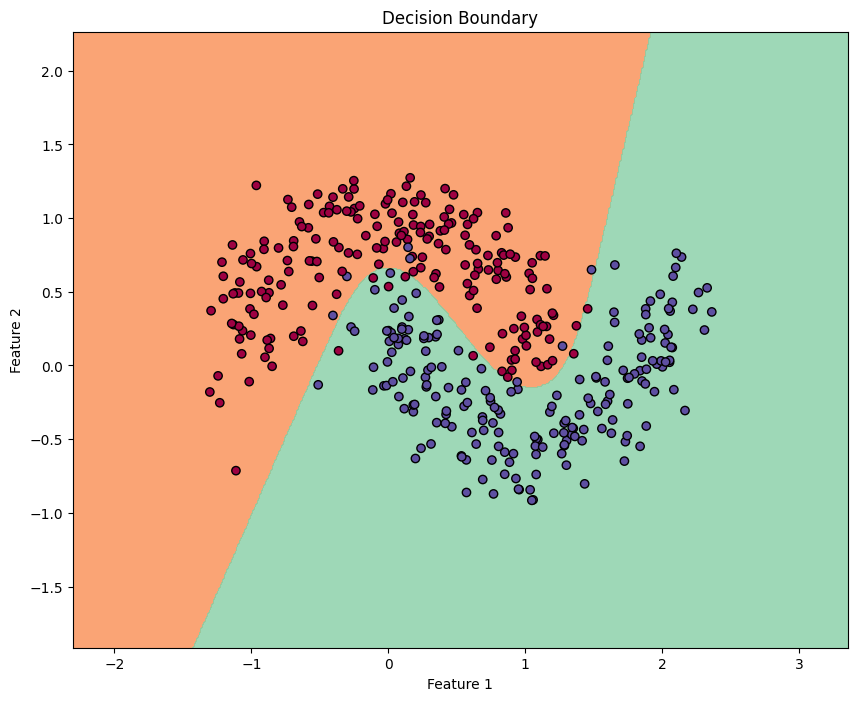

Accuracy for 3 hidden units: 96.50%


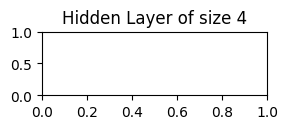

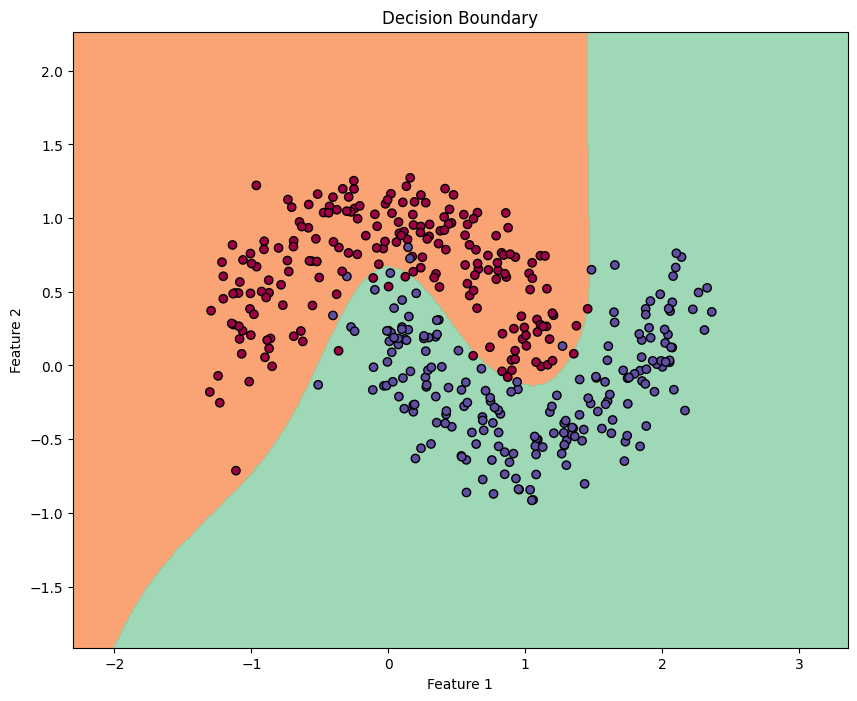

Accuracy for 4 hidden units: 96.75%


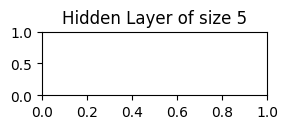

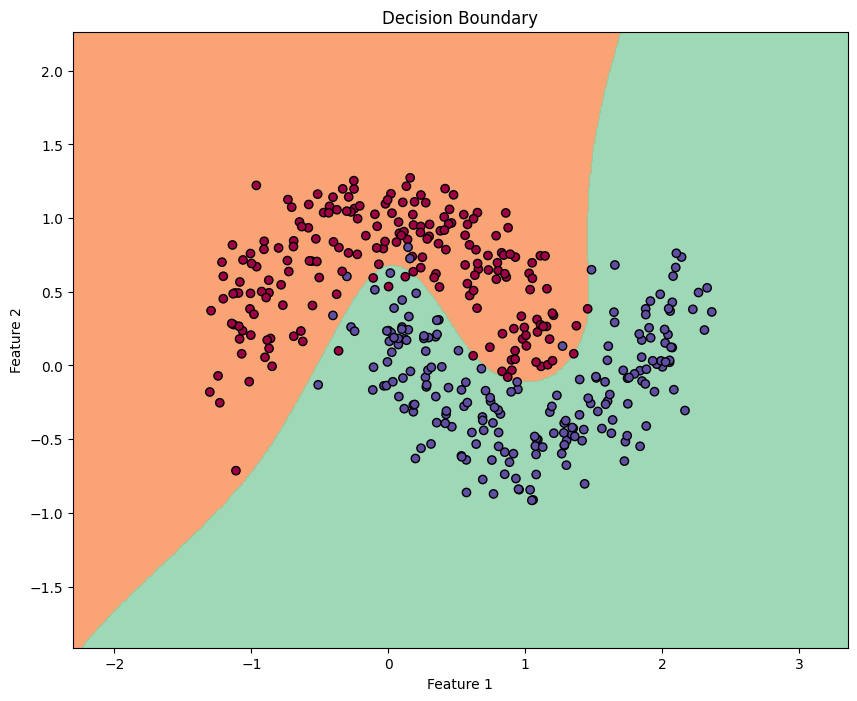

Accuracy for 5 hidden units: 97.50%


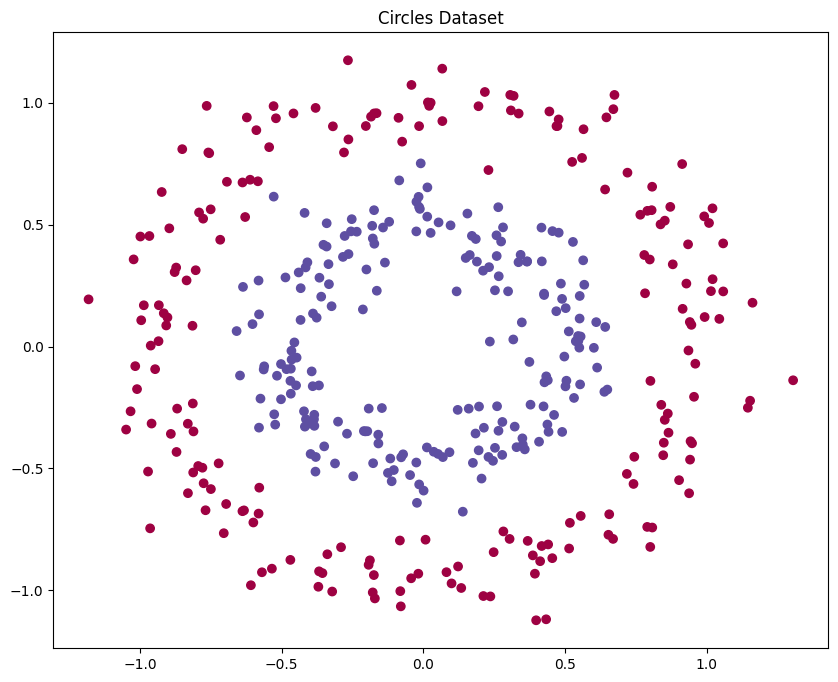

Cost after iteration 0: 0.693148
Cost after iteration 1000: 0.693119
Cost after iteration 2000: 0.221853
Cost after iteration 3000: 0.052039
Cost after iteration 4000: 0.035702


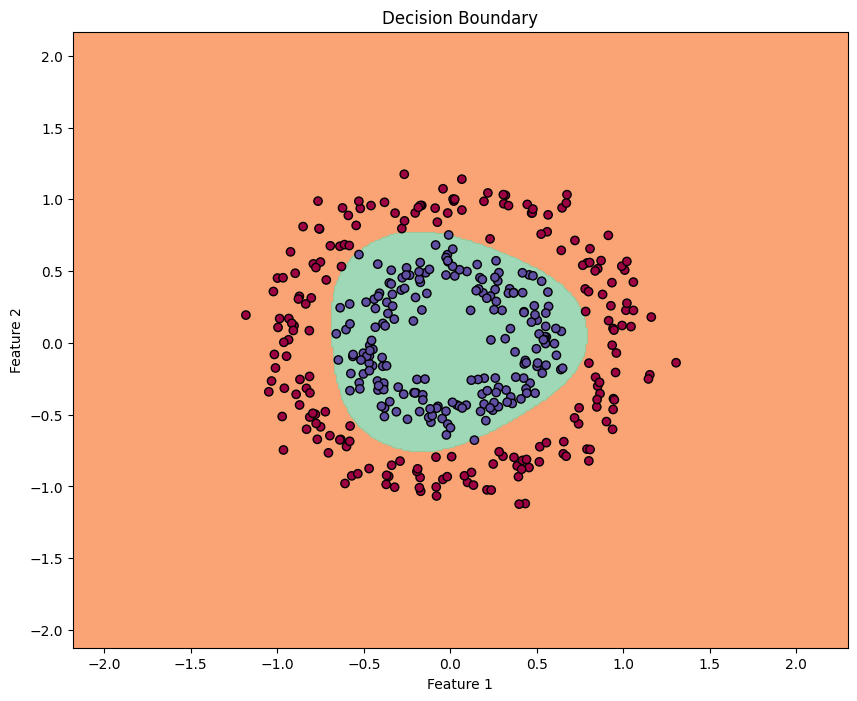

Accuracy on circles dataset: 99.50%


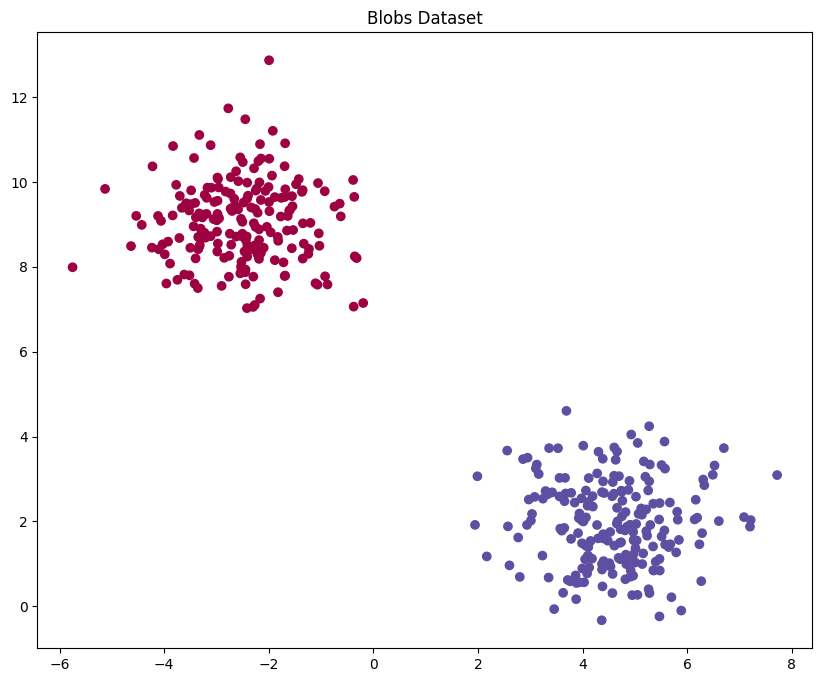

Cost after iteration 0: 0.691865
Cost after iteration 1000: 0.000211
Cost after iteration 2000: 0.000105
Cost after iteration 3000: 0.000070
Cost after iteration 4000: 0.000053


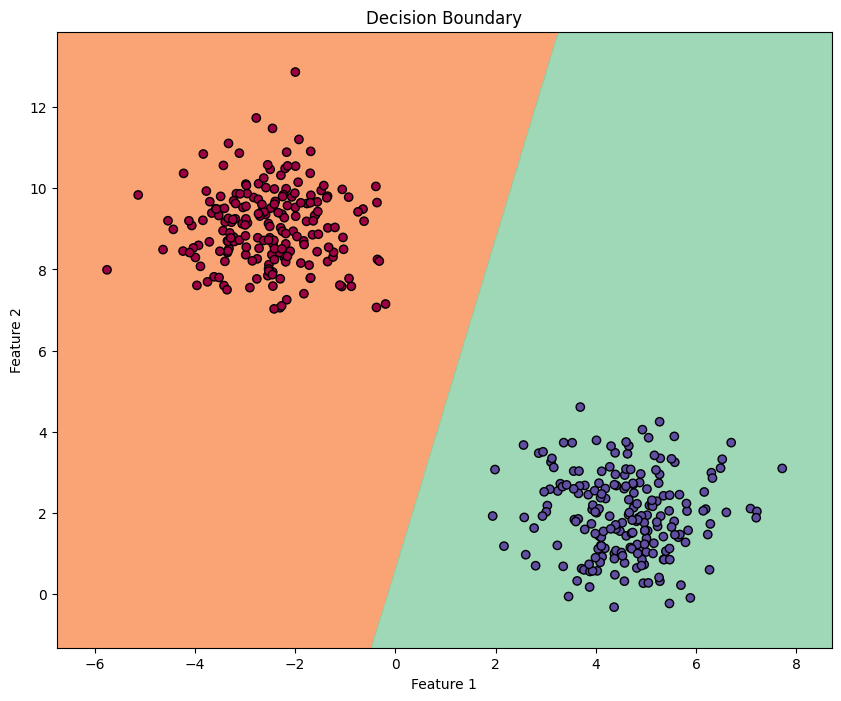

Accuracy on blobs dataset: 100.00%


In [81]:
# Optional: Tuning hidden layer size
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5]

for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = nn_model(X, Y, n_h, num_iterations=5000)
    
    def nn_predict_function_tuned(X):
        return predict(parameters, X)
    
    plot_decision_boundary(nn_predict_function_tuned, X, Y)
    
    predictions = predict(parameters, X)
    accuracy = 100 * np.mean(predictions == Y)
    print("Accuracy for {} hidden units: {:0.2f}%".format(n_h, accuracy))

# Optional: Test on different datasets
from sklearn.datasets import make_circles, make_blobs

# Create a function to generate and test different datasets
def test_on_dataset(dataset_name, n_h=4):
    plt.figure(figsize=(10, 8))
    
    if dataset_name == "circles":
        X_data, Y_data = make_circles(n_samples=400, noise=0.1, factor=0.5, random_state=42)
    elif dataset_name == "blobs":
        X_data, Y_data = make_blobs(n_samples=400, centers=2, n_features=2, random_state=42)
        Y_data = Y_data % 2  # Convert to binary
    elif dataset_name == "moons":
        X_data, Y_data = make_moons(n_samples=400, noise=0.2, random_state=42)
    else:
        print("Dataset not recognized.")
        return
    
    X = X_data.T
    Y = Y_data.reshape(1, Y_data.shape[0])
    
    # Visualize the data
    plt.scatter(X[0, :], X[1, :], c=Y.reshape(-1), cmap=plt.cm.Spectral)
    plt.title(f"{dataset_name.capitalize()} Dataset")
    plt.show()
    
    # Train neural network
    parameters = nn_model(X, Y, n_h=n_h, num_iterations=5000, print_cost=True)
    
    # Plot decision boundary
    def nn_predict_function(X):
        return predict(parameters, X)
    
    plot_decision_boundary(nn_predict_function, X, Y)
    
    # Calculate accuracy
    predictions = predict(parameters, X)
    accuracy = 100 * np.mean(predictions == Y)
    print(f"Accuracy on {dataset_name} dataset: {accuracy:.2f}%")

# Test on circles dataset
test_on_dataset("circles")

# Test on blobs dataset
test_on_dataset("blobs")